## About the dataset

**ORDERNUMBER**: This column represents the unique identification number assigned to each order.<br>
**QUANTITYORDERED**: It indicates the number of items ordered in each order.<br>
**PRICEEACH**: This column specifies the price of each item in the order.<br>
**ORDERLINENUMBER**: It represents the line number of each item within an order.<br>
**SALES**: This column denotes the total sales amount for each order, which is calculated by multiplying the quantity ordered by the price of each item.<br>
**ORDERDATE**: It denotes the date on which the order was placed.<br>
**DAYS_SINCE_LASTORDER**: This column represents the number of days that have passed since the last order for each customer. It can be used to analyze customer purchasing patterns.<br>
**STATUS**: It indicates the status of the order, such as "Shipped," "In Process," "Cancelled," "Disputed," "On Hold," or "Resolved."<br>
**PRODUCTLINE**: This column specifies the product line categories to which each item belongs.<br>
**MSRP**: It stands for Manufacturer's Suggested Retail Price and represents the suggested selling price for each item.<br>
**PRODUCTCODE**: This column represents the unique code assigned to each product.<br>
**CUSTOMERNAME**: It denotes the name of the customer who placed the order.<br>
**PHONE**: This column contains the contact phone number for the customer.<br>
**ADDRESSLINE1**: It represents the first line of the customer's address.<br>
**CITY**: This column specifies the city where the customer is located.<br>
**POSTALCODE**: It denotes the postal code or ZIP code associated with the customer's address.<br>
**COUNTRY**: This column indicates the country where the customer is located.<br>
**CONTACTLASTNAME**: It represents the last name of the contact person associated with the customer.<br>
**CONTACTFIRSTNAME**: This column denotes the first name of the contact person associated with the customer.<br>
**DEALSIZE**: It indicates the size of the deal or order, which are the categories "Small," "Medium," or "Large."<br>

<a id="prep"></a>
# Import Libraries & Load Data

In [1]:
#Import the Libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

from warnings import filterwarnings
filterwarnings('ignore')
plt.rcParams['figure.figsize'] = [20,10]

In [2]:
#Loading the file
df = pd.read_csv('Auto Sales data.csv', parse_dates=['ORDERDATE'], dayfirst=True)

**Interpretation:** We will exclude the "Days Since Order" data point recorded on 2022-06-07 and establish a new baseline for the days difference calculation starting from 02-06-2020 (1st June 2020).

In [3]:
#Checking samples of the data
df

ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0           10107               30      95.70                2  2871.00   
1           10121               34      81.35                5  2765.90   
2           10134               41      94.74                2  3884.34   
3           10145               45      83.26                6  3746.70   
4           10168               36      96.66                1  3479.76   
...           ...              ...        ...              ...      ...   
2742        10350               20     112.22               15  2244.40   
2743        10373               29     137.19                1  3978.51   
2744        10386               43     125.99                4  5417.57   
2745        10397               34      62.24                1  2116.16   
2746        10414               47      65.52                9  3079.44   

      ORDERDATE  DAYS_SINCE_LASTORDER    STATUS  PRODUCTLINE  MSRP  \
0    2018-02-24                   828   Shipped  Motorcycles    95   
1    2018-05-07                   757   Shipped  Motorcycles    95   
2    2018-07-01                   703   Shipped  Motorcycles    95   
3    2018-08-25                   649   Shipped  Motorcycles    95   
4    2018-10-28                   586   Shipped  Motorcycles    95   
...         ...                   ...       ...          ...   ...   
2742 2019-12-02                  2924   Shipped        Ships    54   
2743 2020-01-31                  2865   Shipped        Ships    54   
2744 2020-03-01                  2836  Resolved        Ships    54   
2745 2020-03-28                  2810   Shipped        Ships    54   
2746 2020-05-06                  2772   On Hold        Ships    54   

     PRODUCTCODE             CUSTOMERNAME             PHONE  \
0       S10_1678        Land of Toys Inc.        2125557818   
1       S10_1678       Reims Collectables        26.47.1555   
2       S10_1678          Lyon Souveniers  +33 1 46 62 7555   
3       S10_1678        Toys4GrownUps.com        6265557265   
4       S10_1678     Technics Stores Inc.        6505556809   
...          ...                      ...               ...   
2742    S72_3212    Euro Shopping Channel    (91) 555 94 44   
2743    S72_3212  Oulu Toy Supplies, Inc.        981-443655   
2744    S72_3212    Euro Shopping Channel    (91) 555 94 44   
2745    S72_3212             Alpha Cognac        61.77.6555   
2746    S72_3212        Gifts4AllAges.com        6175559555   

                       ADDRESSLINE1        CITY POSTALCODE  COUNTRY  \
0           897 Long Airport Avenue         NYC      10022      USA   
1                59 rue de l'Abbaye       Reims      51100   France   
2     27 rue du Colonel Pierre Avia       Paris      75508   France   
3                78934 Hillside Dr.    Pasadena      90003      USA   
4                 9408 Furth Circle  Burlingame      94217      USA   
...                             ...         ...        ...      ...   
2742             C/ Moralzarzal, 86      Madrid      28034    Spain   
2743                    Torikatu 38        Oulu      90110  Finland   
2744             C/ Moralzarzal, 86      Madrid      28034    Spain   
2745          1 rue Alsace-Lorraine    Toulouse      31000   France   
2746             8616 Spinnaker Dr.      Boston      51003      USA   

     CONTACTLASTNAME CONTACTFIRSTNAME DEALSIZE  
0                 Yu             Kwai    Small  
1            Henriot             Paul    Small  
2           Da Cunha           Daniel   Medium  
3              Young            Julie   Medium  
4             Hirano             Juri   Medium  
...              ...              ...      ...  
2742          Freyre            Diego    Small  
2743       Koskitalo           Pirkko   Medium  
2744          Freyre            Diego   Medium  
2745          Roulet          Annette    Small  
2746         Yoshido             Juri   Medium  

[2747 rows x 20 columns]

In [4]:
#Dimentions of the data
df.shape

(2747, 20)

**Interpretation:** Exclude the "days since last order" feature and introduce a new feature that represents the time difference as follows: Subtract the date of the last order from June 1, 2020.

In [5]:
# Create a new feature 'DAYS_SINCE_LASTORDER' based on the time difference
# Drop the 'DAYS_SINCE_LASTORDER' column
df = df.drop('DAYS_SINCE_LASTORDER', axis=1)

# Create a new feature 'DAYS_SINCE_LASTORDER' based on the time difference
from datetime import datetime

temp_date = datetime(2020, 6, 1)  # Define the specific date
df['DAYS_SINCE_LASTORDER'] = (temp_date- df['ORDERDATE']).dt.days

In [6]:
#Checking first & last 5 samples of the data
df

ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0           10107               30      95.70                2  2871.00   
1           10121               34      81.35                5  2765.90   
2           10134               41      94.74                2  3884.34   
3           10145               45      83.26                6  3746.70   
4           10168               36      96.66                1  3479.76   
...           ...              ...        ...              ...      ...   
2742        10350               20     112.22               15  2244.40   
2743        10373               29     137.19                1  3978.51   
2744        10386               43     125.99                4  5417.57   
2745        10397               34      62.24                1  2116.16   
2746        10414               47      65.52                9  3079.44   

      ORDERDATE    STATUS  PRODUCTLINE  MSRP PRODUCTCODE  \
0    2018-02-24   Shipped  Motorcycles    95    S10_1678   
1    2018-05-07   Shipped  Motorcycles    95    S10_1678   
2    2018-07-01   Shipped  Motorcycles    95    S10_1678   
3    2018-08-25   Shipped  Motorcycles    95    S10_1678   
4    2018-10-28   Shipped  Motorcycles    95    S10_1678   
...         ...       ...          ...   ...         ...   
2742 2019-12-02   Shipped        Ships    54    S72_3212   
2743 2020-01-31   Shipped        Ships    54    S72_3212   
2744 2020-03-01  Resolved        Ships    54    S72_3212   
2745 2020-03-28   Shipped        Ships    54    S72_3212   
2746 2020-05-06   On Hold        Ships    54    S72_3212   

                 CUSTOMERNAME             PHONE  \
0           Land of Toys Inc.        2125557818   
1          Reims Collectables        26.47.1555   
2             Lyon Souveniers  +33 1 46 62 7555   
3           Toys4GrownUps.com        6265557265   
4        Technics Stores Inc.        6505556809   
...                       ...               ...   
2742    Euro Shopping Channel    (91) 555 94 44   
2743  Oulu Toy Supplies, Inc.        981-443655   
2744    Euro Shopping Channel    (91) 555 94 44   
2745             Alpha Cognac        61.77.6555   
2746        Gifts4AllAges.com        6175559555   

                       ADDRESSLINE1        CITY POSTALCODE  COUNTRY  \
0           897 Long Airport Avenue         NYC      10022      USA   
1                59 rue de l'Abbaye       Reims      51100   France   
2     27 rue du Colonel Pierre Avia       Paris      75508   France   
3                78934 Hillside Dr.    Pasadena      90003      USA   
4                 9408 Furth Circle  Burlingame      94217      USA   
...                             ...         ...        ...      ...   
2742             C/ Moralzarzal, 86      Madrid      28034    Spain   
2743                    Torikatu 38        Oulu      90110  Finland   
2744             C/ Moralzarzal, 86      Madrid      28034    Spain   
2745          1 rue Alsace-Lorraine    Toulouse      31000   France   
2746             8616 Spinnaker Dr.      Boston      51003      USA   

     CONTACTLASTNAME CONTACTFIRSTNAME DEALSIZE  DAYS_SINCE_LASTORDER  
0                 Yu             Kwai    Small                   828  
1            Henriot             Paul    Small                   756  
2           Da Cunha           Daniel   Medium                   701  
3              Young            Julie   Medium                   646  
4             Hirano             Juri   Medium                   582  
...              ...              ...      ...                   ...  
2742          Freyre            Diego    Small                   182  
2743       Koskitalo           Pirkko   Medium                   122  
2744          Freyre            Diego   Medium                    92  
2745          Roulet          Annette    Small                    65  
2746         Yoshido             Juri   Medium                    26  

[2747 rows x 20 columns]

In [7]:
#Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ORDERNUMBER           2747 non-null   int64         
 1   QUANTITYORDERED       2747 non-null   int64         
 2   PRICEEACH             2747 non-null   float64       
 3   ORDERLINENUMBER       2747 non-null   int64         
 4   SALES                 2747 non-null   float64       
 5   ORDERDATE             2747 non-null   datetime64[ns]
 6   STATUS                2747 non-null   object        
 7   PRODUCTLINE           2747 non-null   object        
 8   MSRP                  2747 non-null   int64         
 9   PRODUCTCODE           2747 non-null   object        
 10  CUSTOMERNAME          2747 non-null   object        
 11  PHONE                 2747 non-null   object        
 12  ADDRESSLINE1          2747 non-null   object        
 13  CITY              

**Interpretation:** The dataset comprises 2747 entries distributed across 20 columns. Notably, all columns exhibit complete data with 2747 non-null values, indicating the absence of missing data. Key information encompassed within the dataset encompasses sales transaction details, customer particulars, product specifications, order status and recency information. Data types are diverse, encompassing floats, datetime entries, and objects.

###### Check the dimensions of both datasets:- 
ORDERNUMBER is not pertinent to the Exploratory Data Analysis (EDA) process, so we will exclude it from our analysis and visualizations.

In [8]:
df_num = df.select_dtypes(include=['float64', 'int64']).drop(columns=['ORDERNUMBER'])
print(df_num.columns, len(list(df_num.columns.values)))

Index(['QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER', 'SALES', 'MSRP',
       'DAYS_SINCE_LASTORDER'],
      dtype='object') 6


###### Categorical Features:-
We will exclude the following columns from our analysis as they are not needed for the plots: 'PHONE', 'ADDRESSLINE1', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME'.

In [9]:
df_cat = df.select_dtypes(include = ['object']).drop(columns=['PHONE','ADDRESSLINE1', 'CONTACTLASTNAME','CONTACTFIRSTNAME'])
print(df_cat.columns, len(list(df_cat.columns.values)))

Index(['STATUS', 'PRODUCTLINE', 'PRODUCTCODE', 'CUSTOMERNAME', 'CITY',
       'POSTALCODE', 'COUNTRY', 'DEALSIZE'],
      dtype='object') 8


###### Descriptive Summary

In [10]:
#Descriptive Summary of the dataset - Numeric features

display(round(df_num.describe(),2).T)

count     mean      std     min      25%      50%  \
QUANTITYORDERED       2747.0    35.10     9.76    6.00    27.00    35.00   
PRICEEACH             2747.0   101.10    42.04   26.88    68.74    95.55   
ORDERLINENUMBER       2747.0     6.49     4.23    1.00     3.00     6.00   
SALES                 2747.0  3553.05  1838.95  482.13  2204.35  3184.80   
MSRP                  2747.0   100.69    40.11   33.00    68.00    99.00   
DAYS_SINCE_LASTORDER  2747.0   384.09   230.23    1.00   197.00   343.00   

                          75%       max  
QUANTITYORDERED         43.00     97.00  
PRICEEACH              127.10    252.87  
ORDERLINENUMBER          9.00     18.00  
SALES                 4503.09  14082.80  
MSRP                   124.00    214.00  
DAYS_SINCE_LASTORDER   571.00    877.00

In [11]:
#Descriptive Summary of the dataset - Categorical features

df.select_dtypes(include = ['object']).describe().T

count unique                    top  freq
STATUS            2747      6                Shipped  2541
PRODUCTLINE       2747      7           Classic Cars   949
PRODUCTCODE       2747    109               S18_3232    51
CUSTOMERNAME      2747     89  Euro Shopping Channel   259
PHONE             2747     88         (91) 555 94 44   259
ADDRESSLINE1      2747     89     C/ Moralzarzal, 86   259
CITY              2747     71                 Madrid   304
POSTALCODE        2747     73                  28034   259
COUNTRY           2747     19                    USA   928
CONTACTLASTNAME   2747     76                 Freyre   259
CONTACTFIRSTNAME  2747     72                  Diego   259
DEALSIZE          2747      3                 Medium  1349

**Interpretation:**
    
Sales Amount: The typical sales amount per transaction hovers around '3,553', with customers making purchases spanning from '482.13' to '14,082.80.'

Quantity Ordered: On average, customers order approximately 35 items per transaction, with a minimum of 6 and a maximum of 97 items.

Price Each: The average price of each item in an order is approximately 101, ranging from a minimum of 26.88 to a maximum of 252.87.

Manufacturer's Suggested Retail Price (MSRP): The average MSRP is about 00.69, with prices ranging from 33 to 214.

Order Status: The most prevalent order status is "Shipped," occurring 2541 times.

Product Line: The dominant product line is "Classic Cars," constituting 949 entries.

Customer Concentration: The leading customer is the "Euro Shopping Channel," with 259 transactions.

Geographic Trends: "Madrid" and "USA" emerge as the most frequent city and country, respectively.

Deal Sizes: The majority of deals fall into the "Medium" category, accounting for 1349 cases.    

###### Missing Values

In [12]:
#Missing values
df.isnull().sum()

ORDERNUMBER             0
QUANTITYORDERED         0
PRICEEACH               0
ORDERLINENUMBER         0
SALES                   0
ORDERDATE               0
STATUS                  0
PRODUCTLINE             0
MSRP                    0
PRODUCTCODE             0
CUSTOMERNAME            0
PHONE                   0
ADDRESSLINE1            0
CITY                    0
POSTALCODE              0
COUNTRY                 0
CONTACTLASTNAME         0
CONTACTFIRSTNAME        0
DEALSIZE                0
DAYS_SINCE_LASTORDER    0
dtype: int64

###### Duplicate Values

In [13]:
#Checking duplicate values
df.duplicated().sum()

0

###### Univariate Analysis

In [14]:
cat_columns = df[['STATUS', 'PRODUCTLINE', 'DEALSIZE']]
def univariateAnalysis_category(cols):
    print("Distribution of", cols)
    print("_"* 60)
    colors = ['#79a5db', '#e0a580', '#6fab90', '#896ca8', '#ADD8E6']
    value_counts = cat_columns[cols].value_counts()
    # Count plot
    fig = px.bar(value_counts,x=value_counts.index, y=value_counts.values, title=f'Distribution of {cols}',
        labels={'x': 'Categories', 'y': 'Count'},color_discrete_sequence=[colors])
    fig.update_layout(width=700)
    fig.update_layout(plot_bgcolor='#ffffff', paper_bgcolor='#ffffff')
    fig.show()
    # Donut chart
    percentage = (value_counts / value_counts.sum()) * 100
    fig = px.pie( values=percentage, names=value_counts.index,
        labels={'names': 'Categories', 'values': 'Percentage'}, hole=0.5,color_discrete_sequence=colors)
    fig.add_annotation( x=0.5, y=0.5, align="center", xref="paper",
        yref="paper", showarrow=False, font_size=15, text=f'{cols}')
    fig.update_layout(legend=dict(x=0.9, y=0.5))
    fig.update_layout(width=700)
    fig.show()
    print("       ")
for x in cat_columns:
    univariateAnalysis_category(x)

Distribution of STATUS
____________________________________________________________


       
Distribution of PRODUCTLINE
____________________________________________________________


       
Distribution of DEALSIZE
____________________________________________________________


Description of QUANTITYORDERED
----------------------------------------------------------------------------
count    2747.000000
mean       35.103021
std         9.762135
min         6.000000
25%        27.000000
50%        35.000000
75%        43.000000
max        97.000000
Name: QUANTITYORDERED, dtype: float64 ----------------------------------------------------------------------------
----------------------------------------------------------------------------


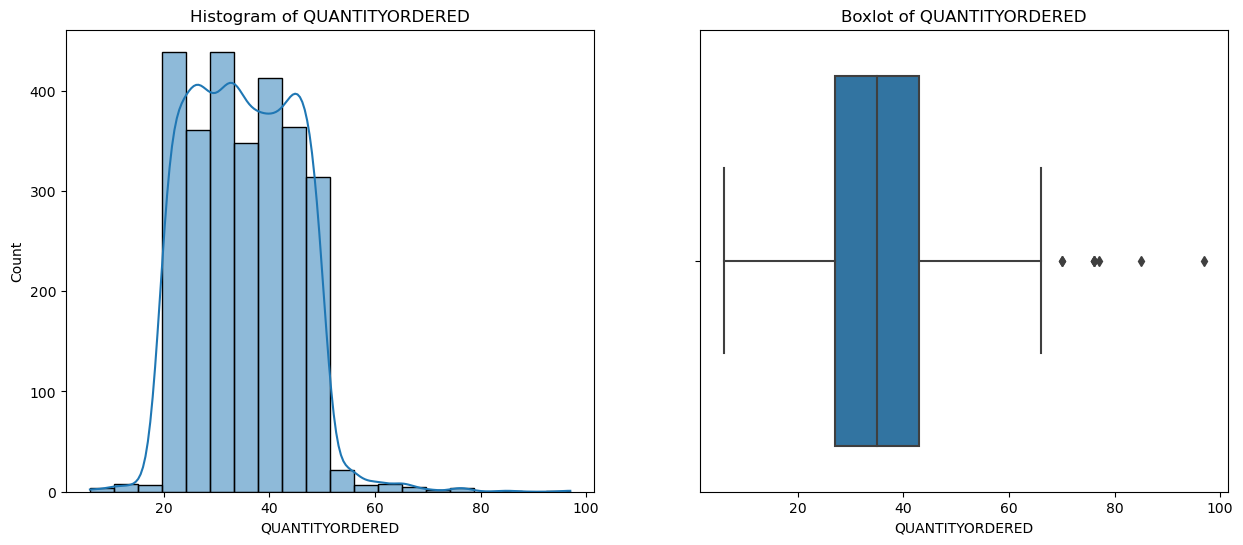

Description of PRICEEACH
----------------------------------------------------------------------------
count    2747.000000
mean      101.098952
std        42.042549
min        26.880000
25%        68.745000
50%        95.550000
75%       127.100000
max       252.870000
Name: PRICEEACH, dtype: float64 ----------------------------------------------------------------------------
----------------------------------------------------------------------------


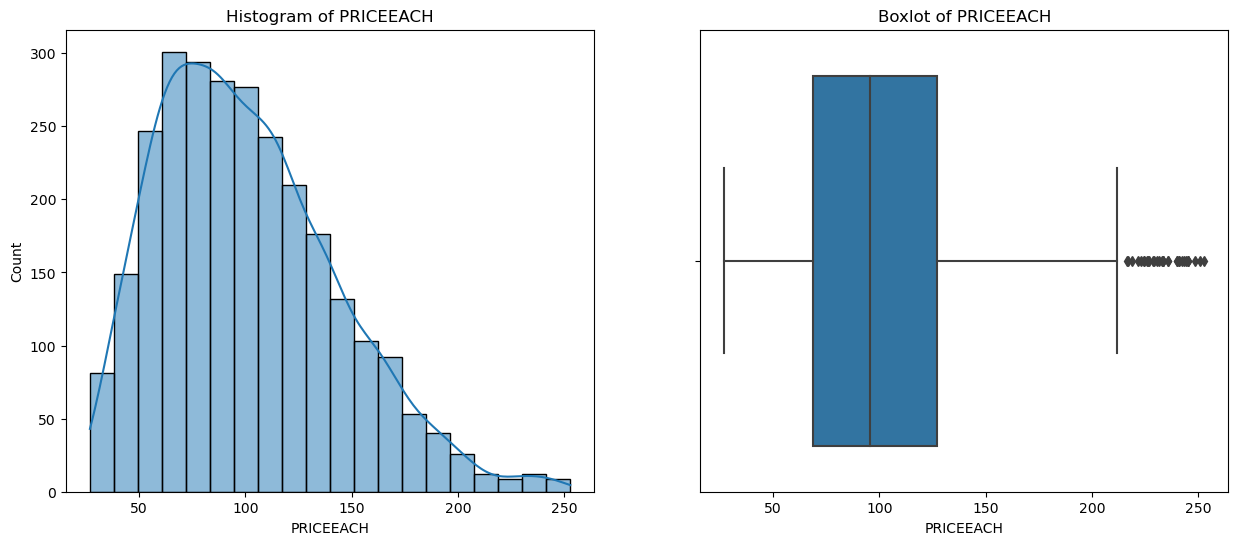

Description of ORDERLINENUMBER
----------------------------------------------------------------------------
count    2747.000000
mean        6.491081
std         4.230544
min         1.000000
25%         3.000000
50%         6.000000
75%         9.000000
max        18.000000
Name: ORDERLINENUMBER, dtype: float64 ----------------------------------------------------------------------------
----------------------------------------------------------------------------


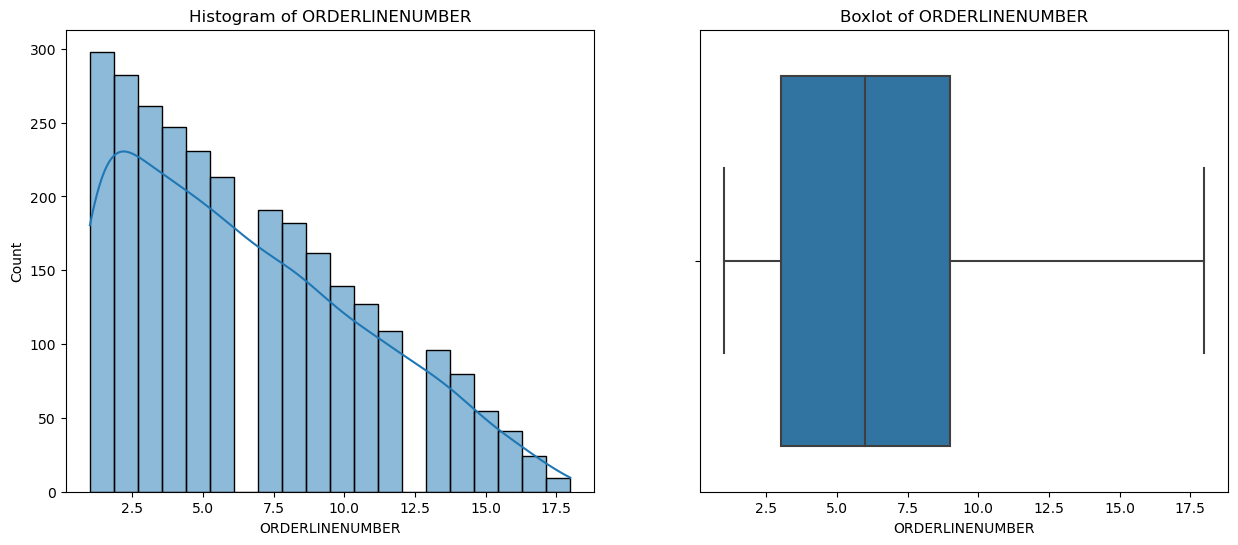

Description of SALES
----------------------------------------------------------------------------
count     2747.000000
mean      3553.047583
std       1838.953901
min        482.130000
25%       2204.350000
50%       3184.800000
75%       4503.095000
max      14082.800000
Name: SALES, dtype: float64 ----------------------------------------------------------------------------
----------------------------------------------------------------------------


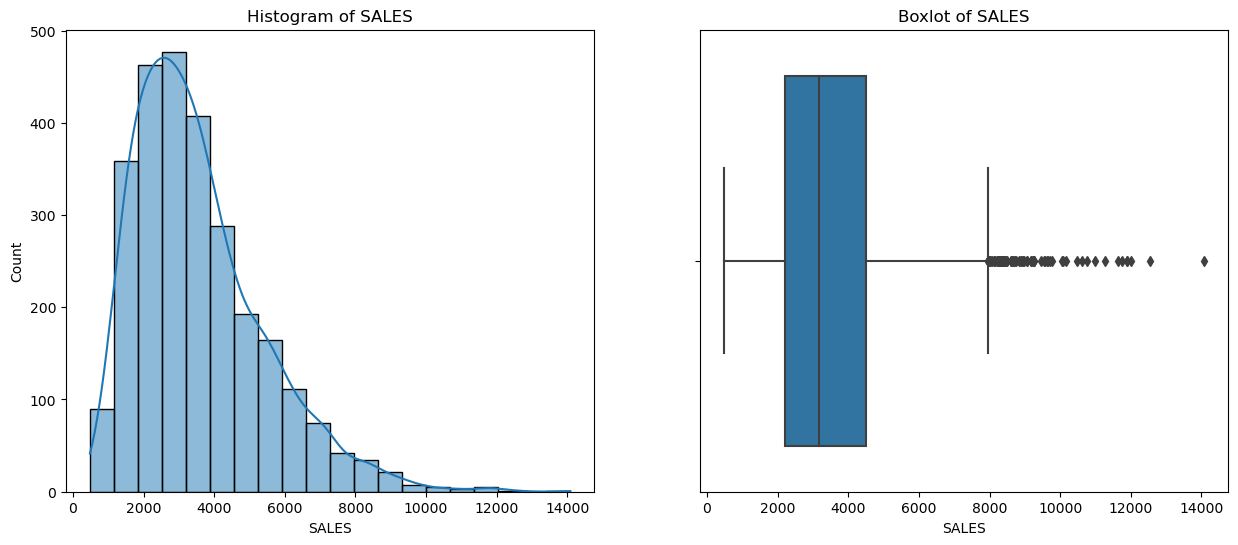

Description of MSRP
----------------------------------------------------------------------------
count    2747.000000
mean      100.691664
std        40.114802
min        33.000000
25%        68.000000
50%        99.000000
75%       124.000000
max       214.000000
Name: MSRP, dtype: float64 ----------------------------------------------------------------------------
----------------------------------------------------------------------------


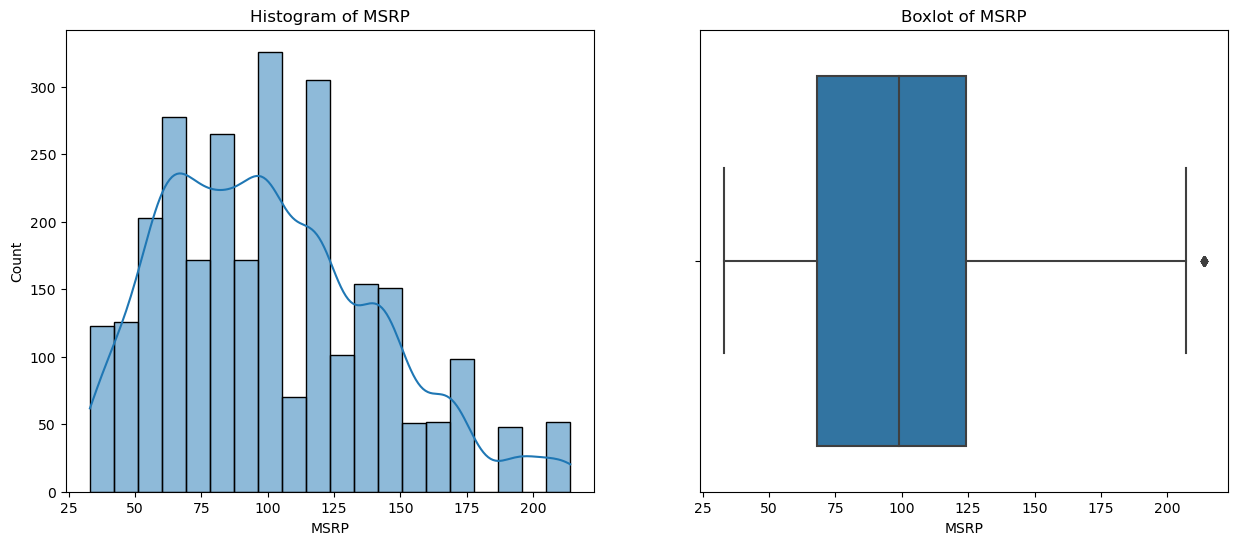

Description of DAYS_SINCE_LASTORDER
----------------------------------------------------------------------------
count    2747.000000
mean      384.085912
std       230.231295
min         1.000000
25%       197.000000
50%       343.000000
75%       571.000000
max       877.000000
Name: DAYS_SINCE_LASTORDER, dtype: float64 ----------------------------------------------------------------------------
----------------------------------------------------------------------------


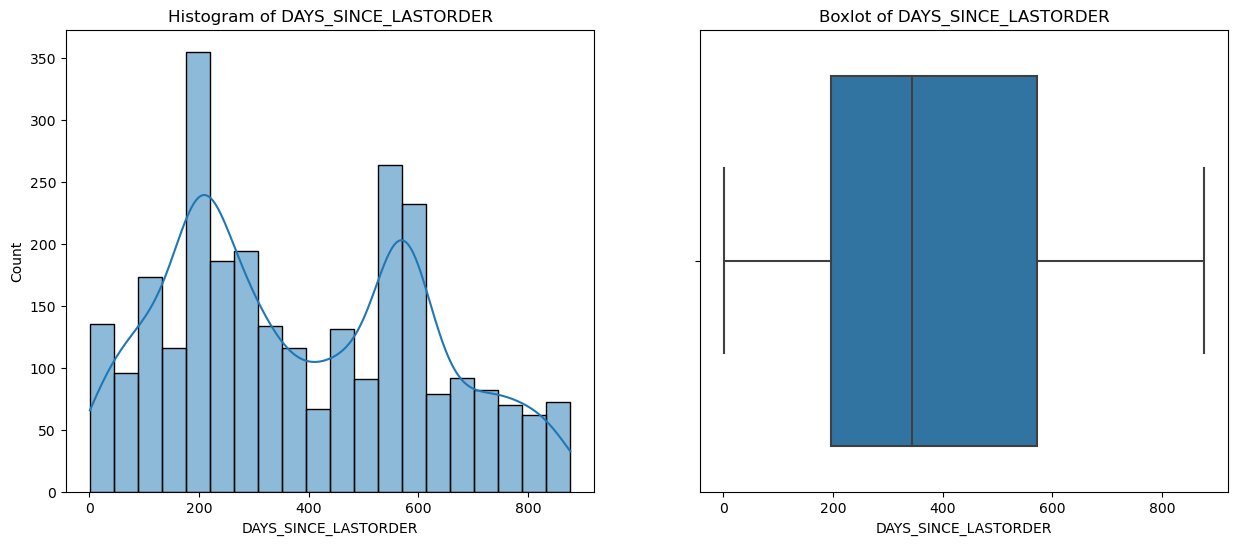

In [15]:
def univariateAnalysis_numeric(column, nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(df[column].describe(), end=' ')
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    # Plot histogram
    print("----------------------------------------------------------------------------")
    sns.histplot(df[column], bins=nbins, kde=True, ax=axes[0])
    axes[0].set_title("Histogram of " + column)
    # Plot violin plot
    print("----------------------------------------------------------------------------")
    sns.boxplot(x=df[column], ax=axes[1])
    axes[1].set_title("Boxlot of " + column )
    plt.show()
for x in df_num:
    univariateAnalysis_numeric(x,20)

In [16]:
#Top 10 Counteries
country_counts = df['COUNTRY'].value_counts()[:10]
fig = go.Figure(go.Funnel(y=country_counts.index,
    x=country_counts.values, textinfo='value', marker={'color': px.colors.sequential.Blues_r}))
fig.update_layout(title_text='Top 10 Country Distribution',  template='plotly_white')
fig.show()

In [17]:
#Top 10 Cities
city_counts = df['CITY'].value_counts()[:10]
fig = go.Figure(go.Funnel(    y=city_counts.index,
    x=city_counts.values,      textinfo='value',
    marker={'color': px.colors.sequential.Blues_r} ))
fig.update_layout(title_text='Top 10 City Distribution', template='plotly_white')
fig.show()

In [18]:
#Top 10 Customer
top10customer = df.sort_values(by="SALES", ascending = False).head(5)
top10customer = df['CUSTOMERNAME'].value_counts()[:10]
fig = go.Figure(go.Funnel(  y=top10customer.index, x=top10customer.values,
    textinfo='value', marker={'color': px.colors.sequential.Blues_r}))
fig.update_layout(title_text='Top 10 Customer Distribution', template='plotly_white')
fig.show()

###### Bivariate Analysis

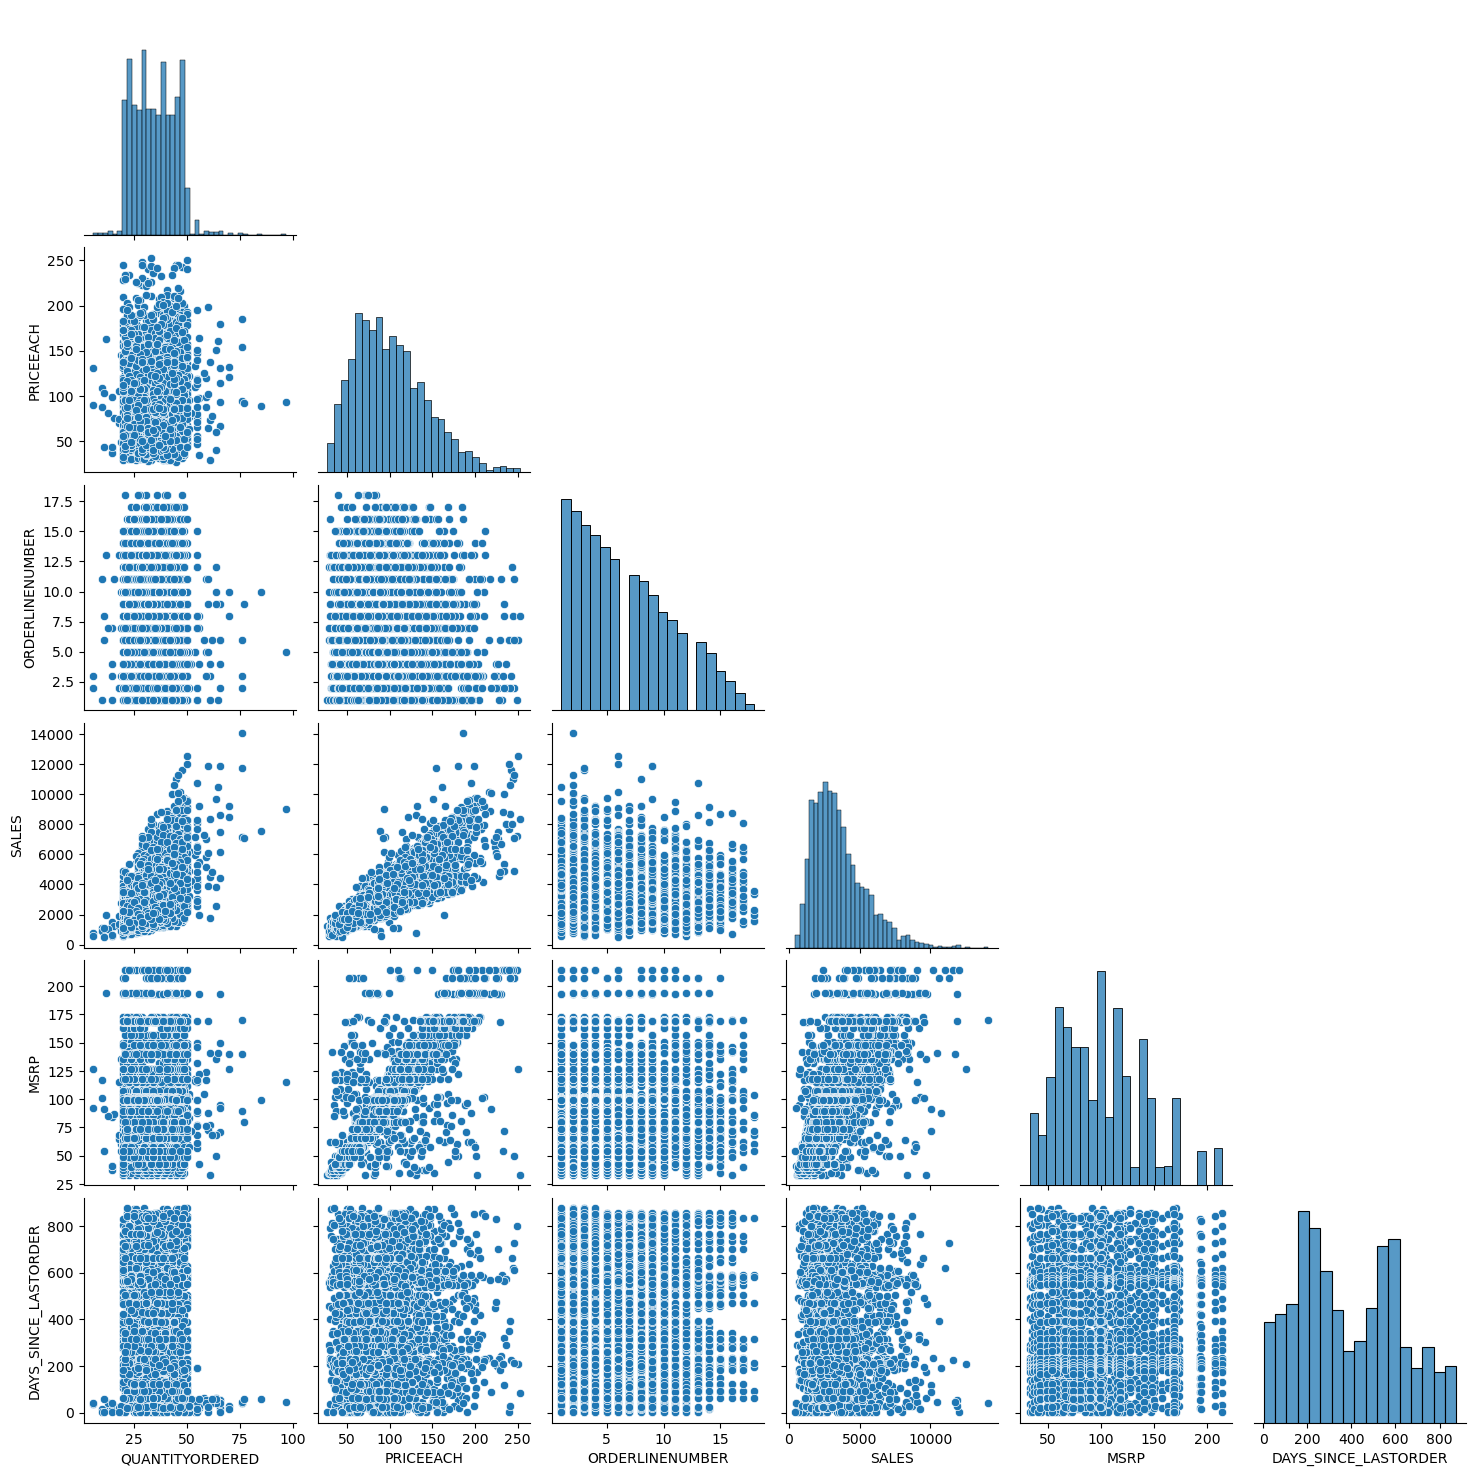

In [19]:
sns.pairplot(data=df_num, corner = True )

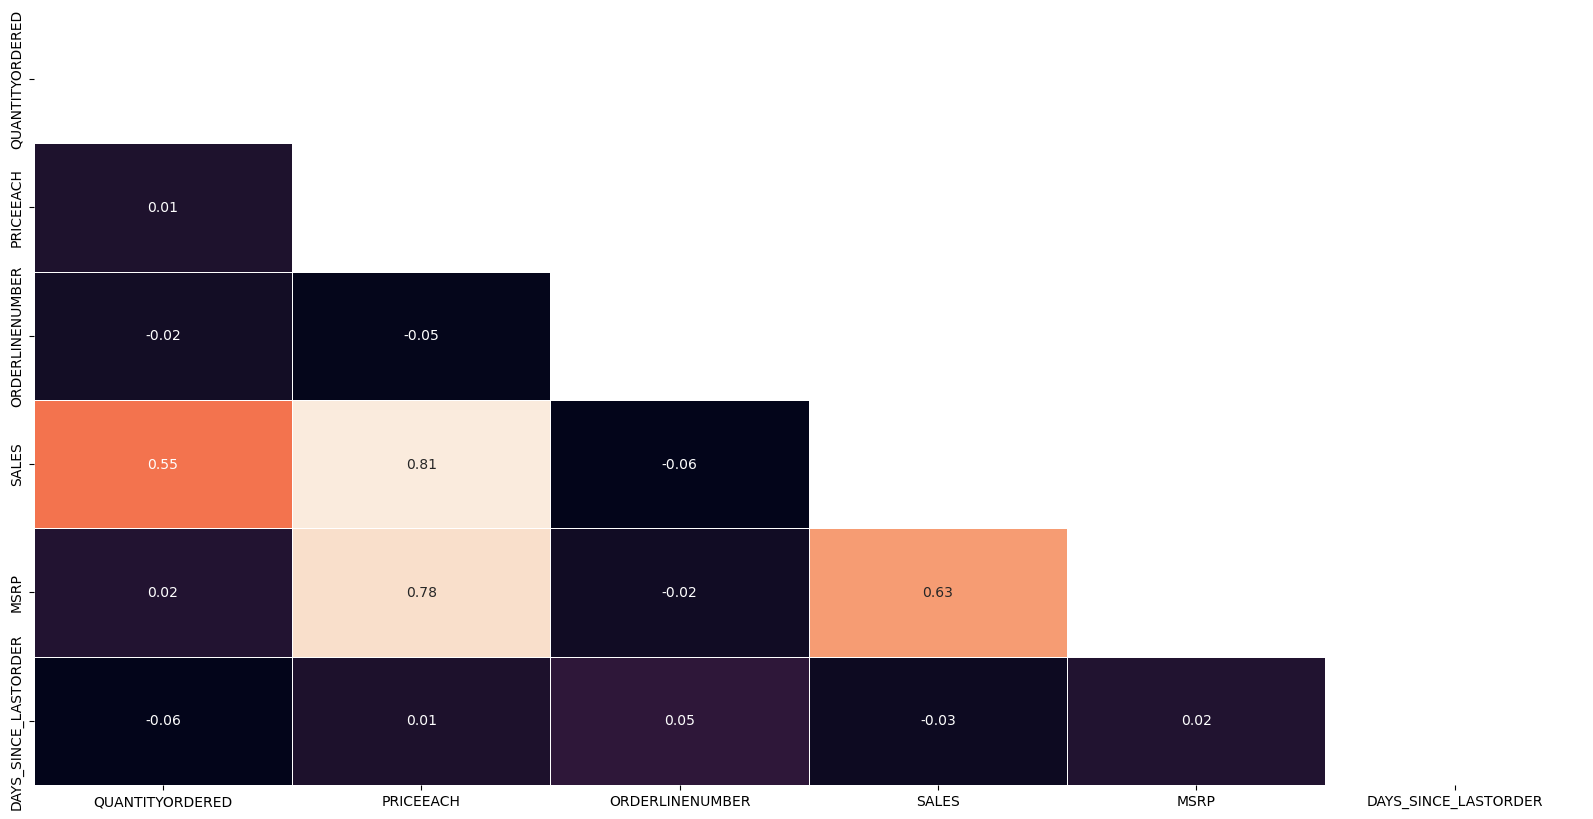

In [20]:
corr = df_num.corr(method='pearson')
mask = np.triu(np.ones_like(corr))
sns.heatmap(corr, annot=True,fmt='.2f',mask=mask, cbar=None, linewidth=0.5)
plt.show()

###### Correlation:-

The quantity ordered (QUANTITYORDERED) and sales (SALES) are positively correlated, indicating that higher quantities ordered by customers often result in increased sales. Essentially, as customers purchase more items, the company's revenue tends to rise.

The price of each item (PRICEEACH) is closely linked to total sales (SALES), suggesting that higher-priced items contribute significantly to increased sales. Therefore, pricing plays a pivotal role in determining overall revenue for the company.

The selling price of items (PRICEEACH) is strongly associated with the manufacturer's suggested retail price (MSRP). Generally, the selling price aligns closely with the recommended price set by the manufacturer.

The time elapsed since a customer's last order (DAYS_SINCE_LASTORDER) shows a weak correlation with the quantity of items ordered. Customers who place orders more frequently may tend to purchase smaller quantities, but this relationship is not very robust.

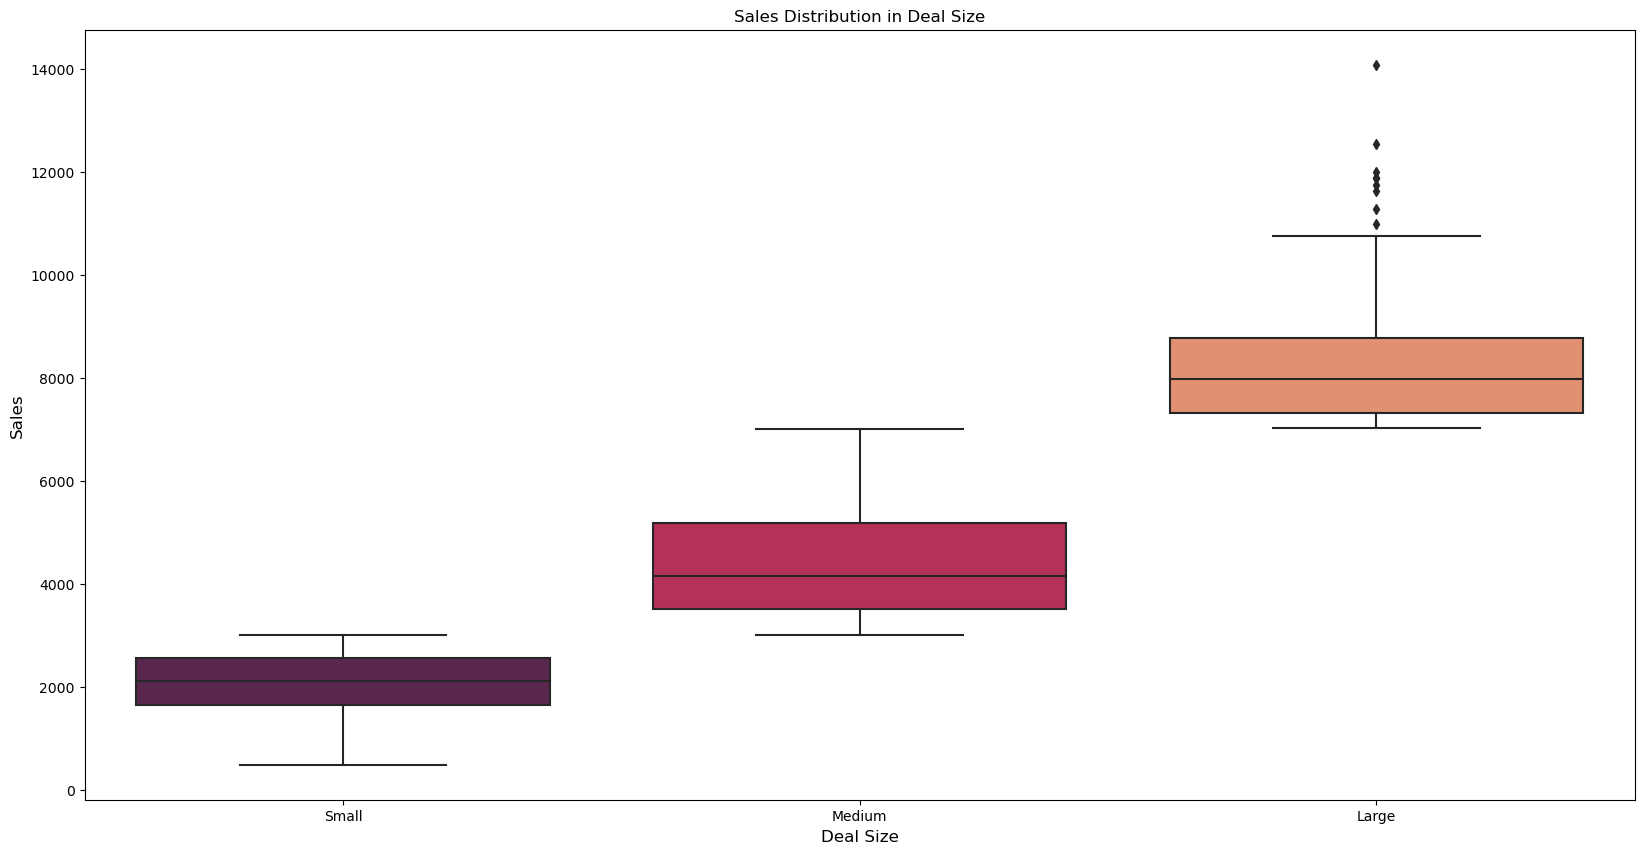

In [21]:
#Sales Distribution in Deal Size 
sns.boxplot(x = 'DEALSIZE' , y = 'SALES' , data = df, palette='rocket')
plt.title('Sales Distribution in Deal Size')
plt.xlabel("Deal Size", fontsize=12)
plt.ylabel("Sales", fontsize=12)
plt.xticks(rotation = 0)
plt.show()

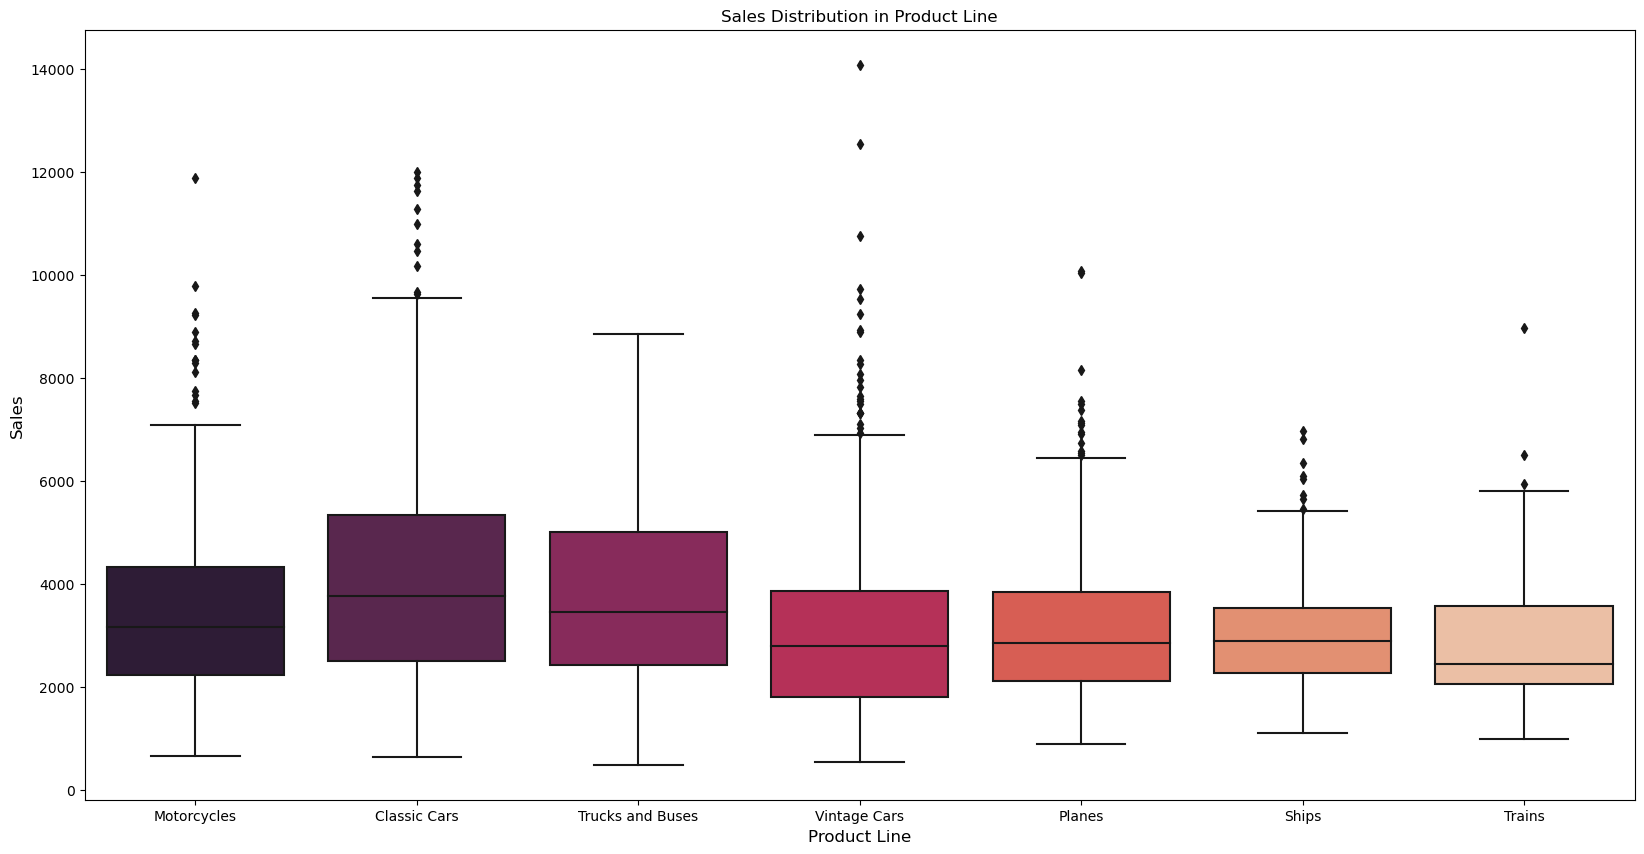

In [22]:
#Sales Distribution in Product Line
sns.boxplot(x = 'PRODUCTLINE' , y = 'SALES' , data = df, palette='rocket')
plt.title('Sales Distribution in Product Line',fontsize=12)
plt.xlabel("Product Line", fontsize=12)
plt.ylabel("Sales", fontsize=12)
plt.show()

###### Yearly, Quarterly, Monthly, weekly Sales Trend

In [23]:
# Extract year, month, week, and quarter from ORDERDATE
df['Year'] = df['ORDERDATE'].dt.year
df['Month'] = df['ORDERDATE'].dt.month
df['Week'] = df['ORDERDATE'].dt.isocalendar().week
df['Quarter'] = df['ORDERDATE'].dt.quarter

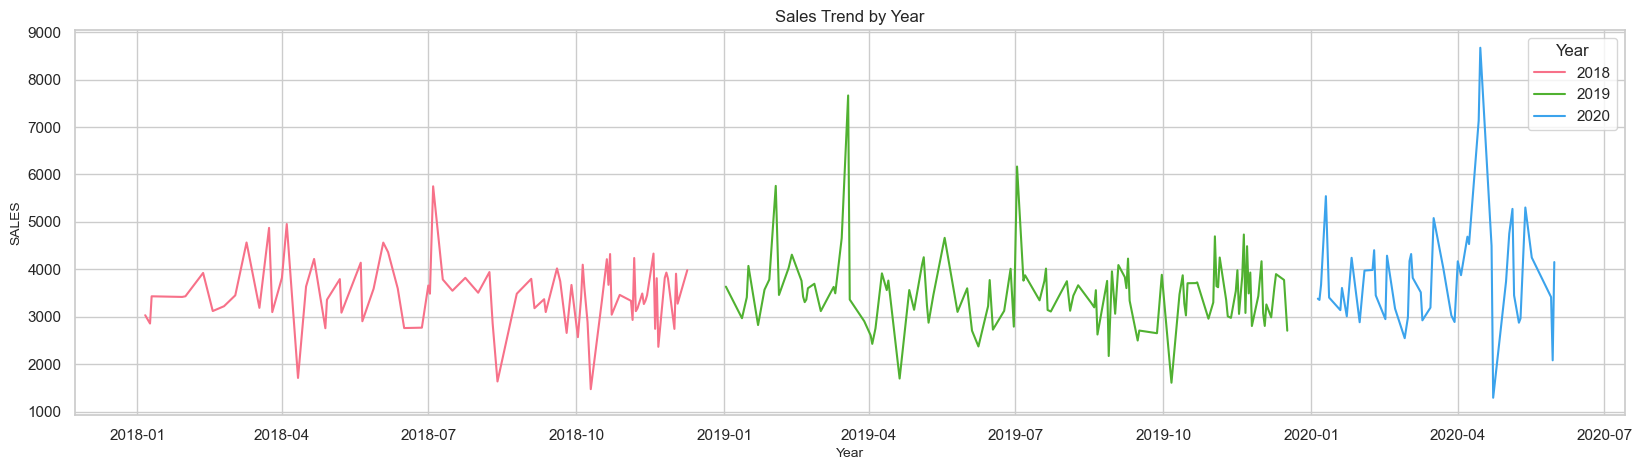

In [24]:
# Sales trend by Year
sns.set(style="whitegrid", rc={"figure.figsize": (20, 5)})
sns.lineplot(data=df, x="ORDERDATE", y="SALES", ci=None, hue="Year",palette=sns.color_palette("husl", len(df['Year'].unique())))
plt.title("Sales Trend by Year")
plt.xlabel("Year", fontsize=10)
plt.ylabel("SALES", fontsize=10)
plt.legend(title="Year", loc='best')
plt.show()

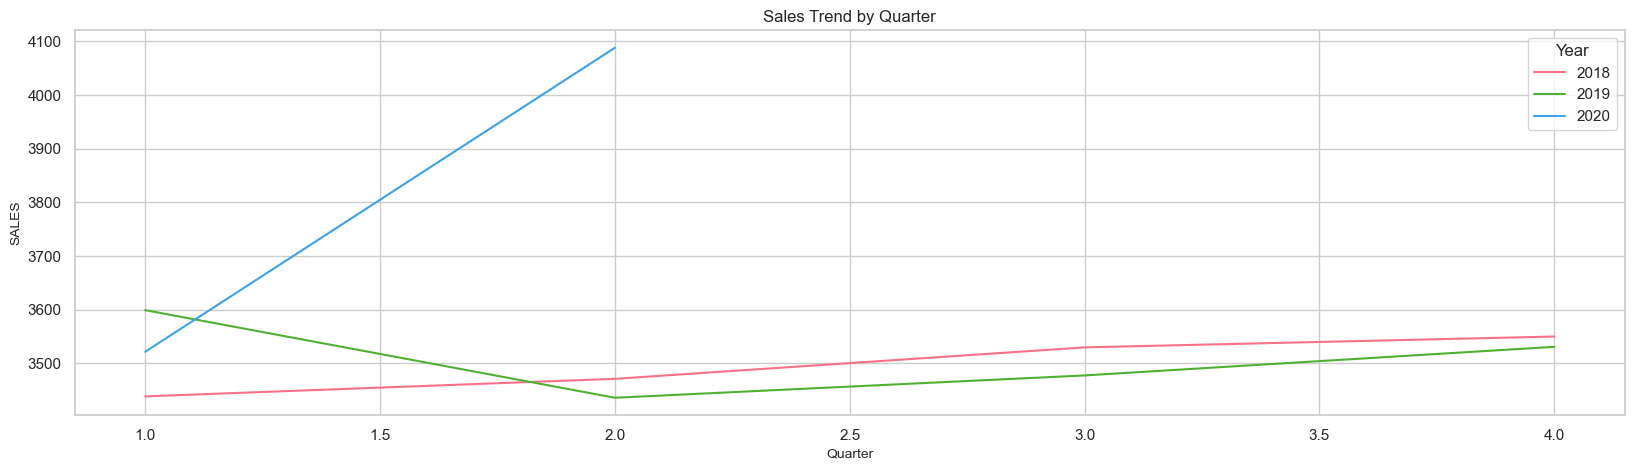

In [25]:
# Sales trend by Quarter
sns.set(style="whitegrid", rc={"figure.figsize": (20, 5)})
sns.lineplot(data=df, x="Quarter", y="SALES", ci=None, hue="Year",palette=sns.color_palette("husl", len(df['Year'].unique())))
plt.title("Sales Trend by Quarter")
plt.xlabel("Quarter", fontsize=10)
plt.ylabel("SALES", fontsize=10)
plt.legend(title="Year", loc='best')
plt.show()

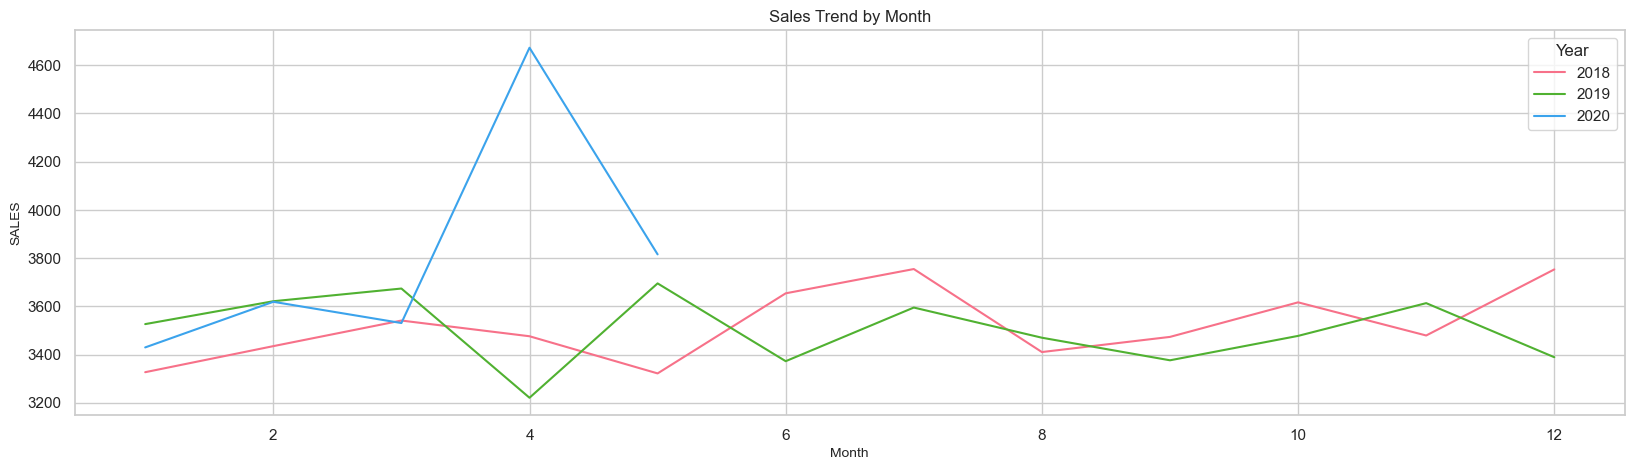

In [26]:
# Sales trend by Month
sns.set(style="whitegrid", rc={"figure.figsize": (20, 5)})
sns.lineplot(data=df, x="Month", y="SALES", ci=None, hue="Year",palette=sns.color_palette("husl", len(df['Year'].unique())))
plt.title("Sales Trend by Month")
plt.xlabel("Month", fontsize=10)
plt.ylabel("SALES", fontsize=10)
plt.legend(title="Year", loc='best')
plt.show()

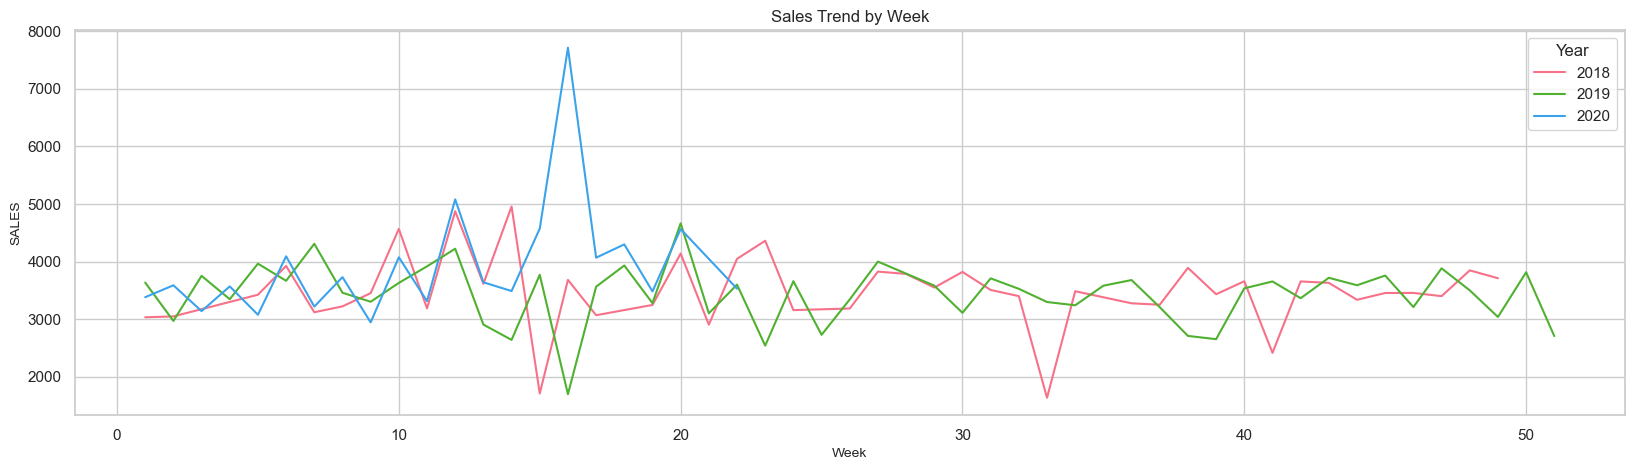

In [27]:
# Sales trend by Week
sns.set(style="whitegrid", rc={"figure.figsize": (20, 5)})
sns.lineplot(data=df, x="Week", y="SALES", ci=None, hue="Year", palette=sns.color_palette("husl", len(df['Year'].unique())))
plt.title("Sales Trend by Week")
plt.xlabel("Week", fontsize=10)
plt.ylabel("SALES", fontsize=10)
plt.legend(title="Year", loc='best')
plt.show()

###### Multivariate Analysis

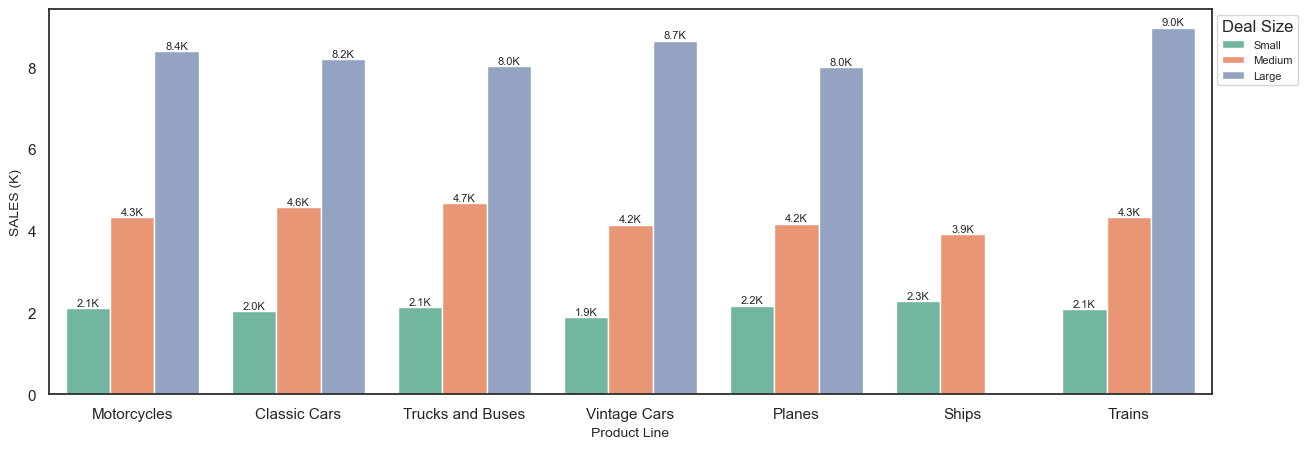

In [28]:
# Comparison between Sales, Product Line along with Dealsize as Hue
sns.set(style="white", rc={"figure.figsize": (15, 5)})
df["SALES (K)"] = df["SALES"] / 1000
sns.barplot(data=df, x="PRODUCTLINE", y="SALES (K)", hue="DEALSIZE", palette="Set2", ci=None)
plt.ylabel("SALES (K)", fontsize=10)
plt.xlabel("Product Line", fontsize=10)
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.1f}K', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=8)
plt.legend(title="Deal Size", fontsize=8, loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

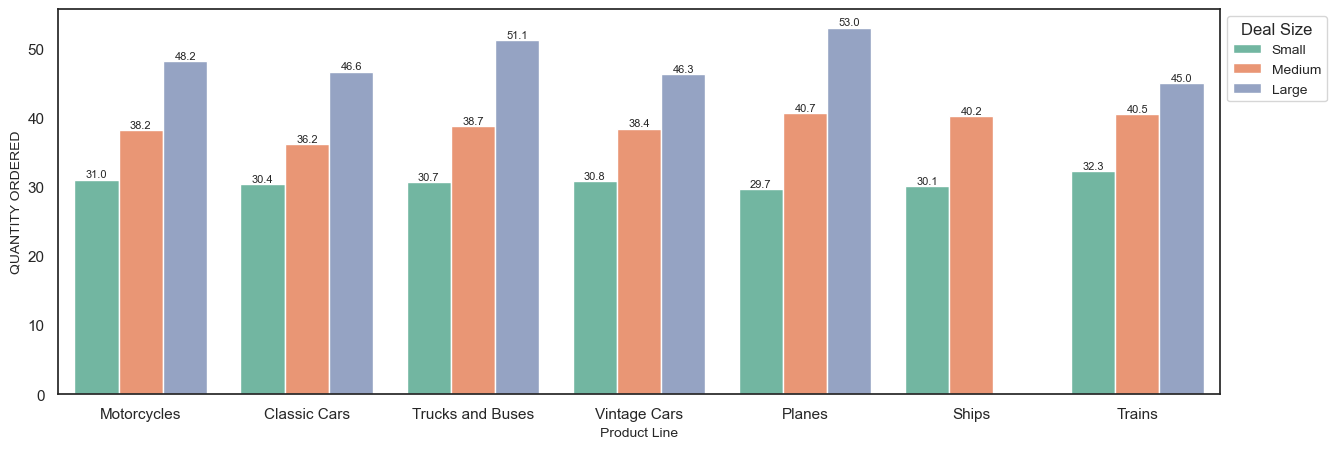

In [29]:
#Comparision between Quantity Ordered, Product Line along with Dealsize as Hue

sns.set(style="white", rc={"figure.figsize": (15, 5)})
sns.barplot(data=df, x="PRODUCTLINE", y="QUANTITYORDERED", hue="DEALSIZE", palette="Set2", ci=None)
plt.ylabel("QUANTITY ORDERED", fontsize=10)
plt.xlabel("Product Line", fontsize=10)
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.1f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom',fontsize=8)
plt.legend(title="Deal Size", fontsize=10, loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

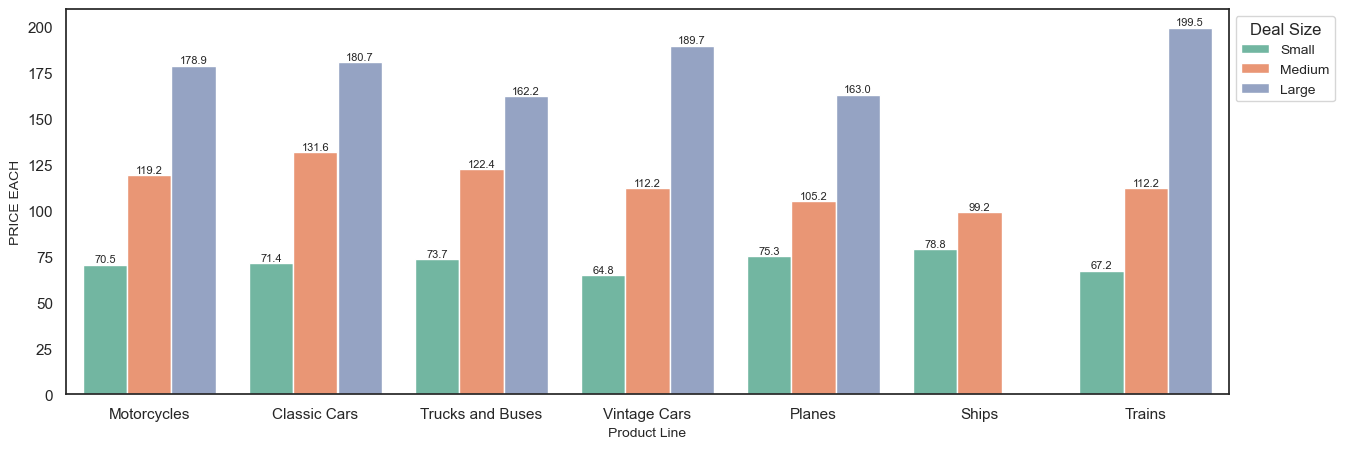

In [30]:
#Comparision between Quantity Ordered, Product Line along with Dealsize as Hue

sns.set(style="white", rc={"figure.figsize": (15, 5)})
sns.barplot(data=df, x="PRODUCTLINE", y="PRICEEACH", hue="DEALSIZE", palette="Set2", ci=None)
plt.ylabel("PRICE EACH", fontsize=10)
plt.xlabel("Product Line", fontsize=10)
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.1f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom',fontsize=8)
plt.legend(title="Deal Size",fontsize=10,  loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

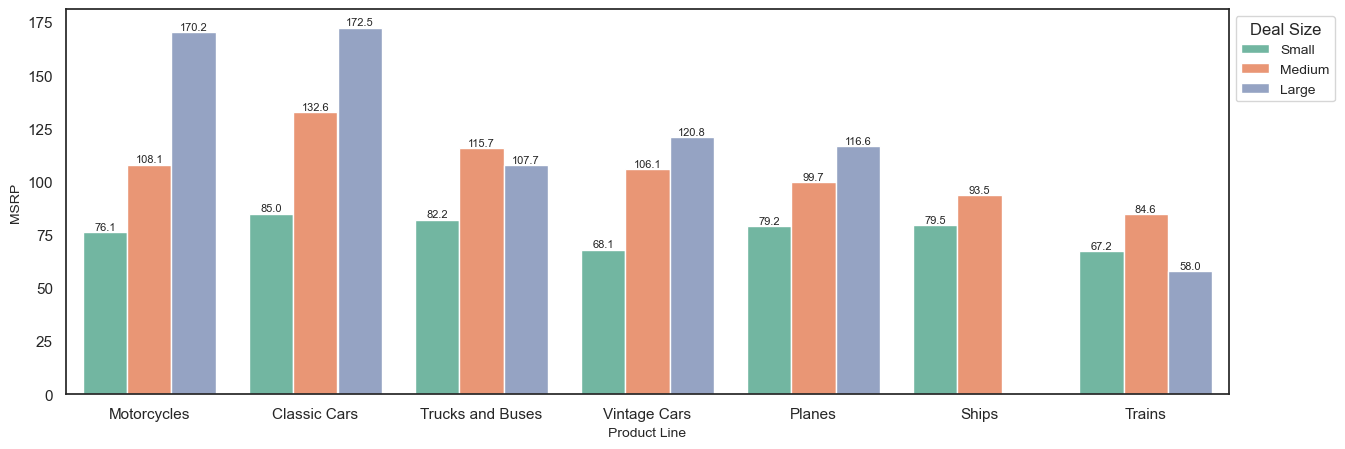

In [31]:
#Comparision between Quantity Ordered, Product Line along with Dealsize as Hue

sns.set(style="white", rc={"figure.figsize": (15, 5)})
sns.barplot(data=df, x="PRODUCTLINE", y="MSRP", hue="DEALSIZE", palette="Set2", ci=None)
plt.ylabel("MSRP", fontsize=10)
plt.xlabel("Product Line", fontsize=10)
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.1f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom',fontsize=8)
plt.legend(title="Deal Size",fontsize=10,  loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

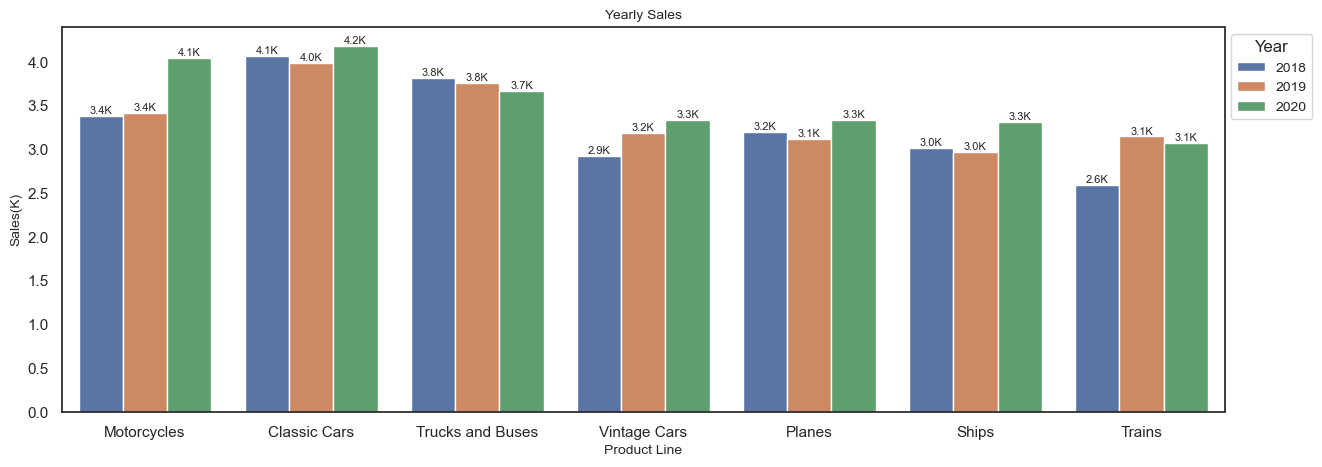

In [32]:
sns.set(style="white", rc={"figure.figsize": (15, 5)})
sns.barplot(data=df, x="PRODUCTLINE", y="SALES (K)", hue="Year",  ci=None)
plt.xlabel("Product Line", fontsize=10)
plt.ylabel("Sales(K)", fontsize=10)
plt.title("Yearly Sales", fontsize=10)
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.1f}K', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom',fontsize=8)
plt.legend(title="Year",fontsize=10,  loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

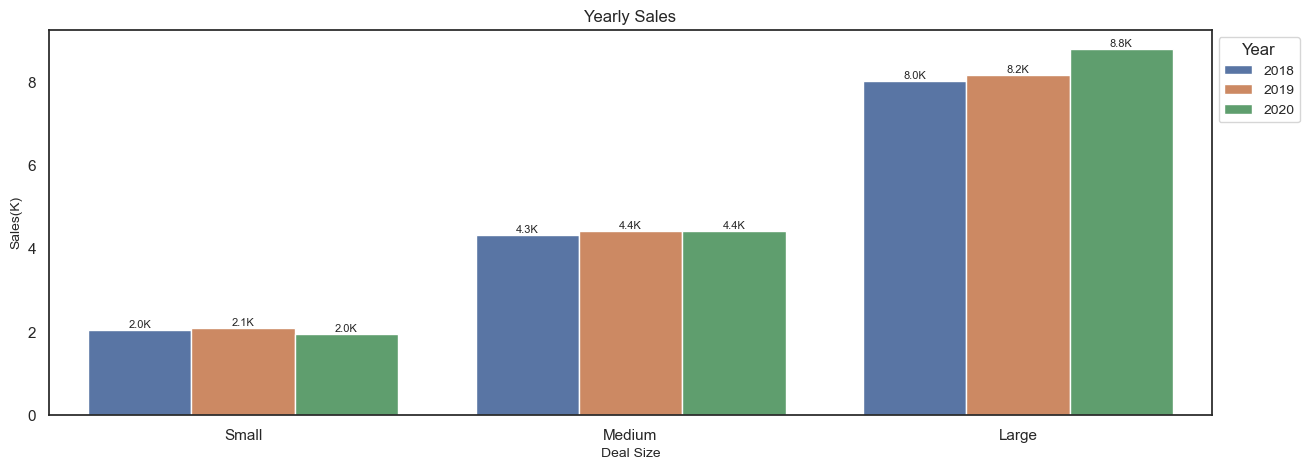

In [33]:
sns.set(style="white", rc={"figure.figsize": (15, 5)})
sns.barplot(data=df, x="DEALSIZE", y="SALES (K)", hue="Year",  ci=None)
plt.xlabel("Deal Size", fontsize=10)
plt.ylabel("Sales(K)", fontsize=10)
plt.title("Yearly Sales", fontsize=12)
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.1f}K', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom',fontsize=8)
plt.legend(title="Year",fontsize=10,  loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

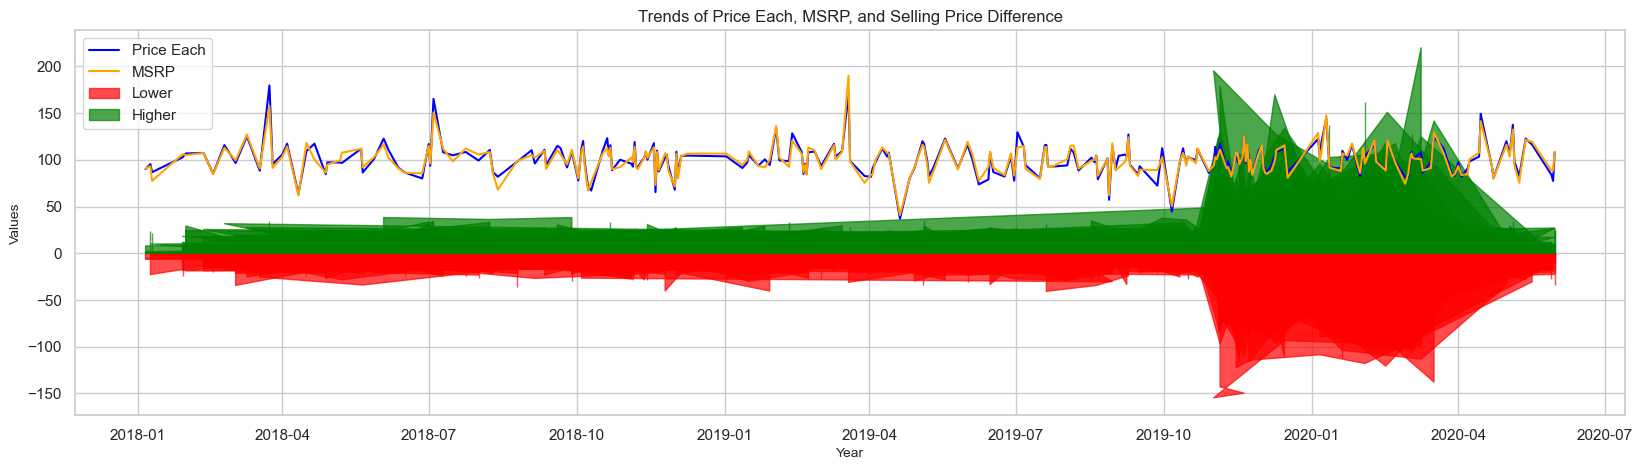

In [34]:
#Trend of Price, MSRP and Selling Price Difference
# Selling Price Difference is calculated as the difference between manufactured suggested price and selling price
df["SELLING_PRICE_DIFF"] =  df["PRICEEACH"]-df["MSRP"]
sns.set(style="whitegrid", rc={"figure.figsize": (20, 5)})
sns.lineplot(data=df, x="ORDERDATE", y="PRICEEACH", ci=None, label="Price Each", color='blue')
sns.lineplot(data=df, x="ORDERDATE", y="MSRP", ci=None, label="MSRP", color='orange')
plt.fill_between(df["ORDERDATE"], df["SELLING_PRICE_DIFF"], where=(df["SELLING_PRICE_DIFF"] < 0), color="red", alpha=0.7, label="Lower")
plt.fill_between(df["ORDERDATE"], df["SELLING_PRICE_DIFF"], where=(df["SELLING_PRICE_DIFF"] >= 0), color="green", alpha=0.7, label="Higher")
plt.title("Trends of Price Each, MSRP, and Selling Price Difference")
plt.xlabel("Year", fontsize=10)
plt.ylabel("Values", fontsize=10)
plt.legend(loc='best')

###### Analysis Summary - Sales Overview:

Over the past 2.5 years, a total of 298 orders were placed by 89 customers spanning 19 countries.
The United States emerges as the leading contributor to sales, closely followed by Spain and France. Noteworthy sales activity is observed in Australia and Singapore in the Eastern Hemisphere.
In terms of cities, Madrid secures the top spot in sales, with San Diego and New York City trailing closely behind.
Sales in the Eastern Hemisphere show a decline in Australia and Singapore, while Japan's customer base was established in 2019.
A substantial increase in sales is evident in the United States and France in 2019.

Product and Revenue Overview:

The company boasts a diverse product line, manufacturing 109 automobile parts across 7 categories, with prices ranging from 26 to 252.
The Classic Car parts category stands out, contributing the highest share of revenue, approximately 40%.
Car, Truck, Bus, and Motorcycle parts collectively constitute 80% of the company's total revenue.

Sales Trends:

A consistent upward sales trend is observed, featuring monthly seasonality and reaching its peak in October and November each year.
Comparatively, the early months of 2020 exhibit heightened sales and increased customer activity compared to previous years.

Concern:

Notably, no new customers have been added since September 2019.

Transaction Characteristics:

Transactions typically consist of medium and small-sized deals, involving 20 to 50 items.

Key Customers:

Euro Shopping Channel and Mini Gifts Distribution Ltd. emerge as the company's top customers, characterized by their substantial spending, frequency of transactions, and recent activity.

Customer Retention:

The company maintains a commendable customer retention rate, with approximately 90% observed in 2019.